## I want to carry out some analysis on company data. I aim to show their health by showing how they are perfoming 🚀📈

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from datetime import datetime
from datetime import datetime
import seaborn as sns
warnings.filterwarnings("ignore")


# Reading the data 👁️‍🗨️

In [5]:
data=pd.read_csv('mpesadata.csv')
data.head(3)

,id,created_at,updated_at,TransactionType,responsecode,merchantrequestid,checkoutrequestid,TransID,TransTime,datetime,...,BusinessShortCode,BillRefNumber,UserRequestNumber,OrgAccountBalance,ThirdPartyTransID,MSISDN,KYCInfo,description,merchant_transaction_id,active
0,1,2021-02-11 21:51:56,2021-02-11 18:51:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,d7z3iTAO,2.547212e+11,NaN,NaN,NaN,NaN,Success. Request accepted for processing,3090-1354737-1,0
1,2,2021-02-11 21:53:55,2021-02-11 18:53:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Tn5qtUK5,2.547212e+11,NaN,NaN,NaN,NaN,Success. Request accepted for processing,1459-1351422-1,0
2,3,2021-02-11 21:55:38,2021-02-11 18:55:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,IKHSW38K,2.547212e+11,NaN,NaN,NaN,NaN,Success. Request accepted for processing,12754-24334136-1,0


# Exploratory Data analysis.
Since i have never interacted with the data, obviousy want to know more about this data.

In [3]:
#Getting to know the data types in the datasets
data.info()
data.describe()
data['KYCInfo'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16139 entries, 0 to 16138
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       16139 non-null  int64  
 1   created_at               16139 non-null  object 
 2   updated_at               16139 non-null  object 
 3   TransactionType          0 non-null      float64
 4   responsecode             15889 non-null  float64
 5   merchantrequestid        0 non-null      float64
 6   checkoutrequestid        0 non-null      float64
 7   TransID                  11567 non-null  object 
 8   TransTime                11567 non-null  object 
 9   datetime                 11567 non-null  object 
 10  TransAmount              16139 non-null  int64  
 11  BusinessShortCode        0 non-null      float64
 12  BillRefNumber            14512 non-null  object 
 13  UserRequestNumber        14512 non-null  float64
 14  OrgAccountBalance     

KYCInfo
Benrogers Kitavi Kyalo    287
rajab mohammed ali        216
masuud                    205
LYDIA                     187
SYLVIA MORAA NTABO        158
                         ... 
MAGDALINE WANJA MURAYA      1
isaac                       1
ROBERT GITUA MUORIA         1
JOSEPH KIARIE KIMANI        1
stacy                       1
Name: count, Length: 1113, dtype: int64

## Creating a subset of the data to get only the name column and transaction column 😎

In [3]:
def subset_dataframe(df, col1, col2):
    """
    Subsets the input DataFrame to include only the specified two columns.

    Parameters:
    df : The input DataFrame.
    col1 : The name of the first column to include.
    col2 : The name of the second column to include.

    Returns:
    pd.DataFrame: A new DataFrame with only the specified two columns.
    """
    if col1 in df.columns and col2 in df.columns:
        return df[[col1, col2]]
    else:
        raise ValueError("One or both columns not found in the DataFrame")

dateTrans=subset_dataframe(data,'created_at','TransAmount')



## Data exploration 🕵️

I want to analyze the spending of the customers. This can be best visualized using a boxplot.

Might consider a Violin Plot:
Violin plots combine boxplots with kernel density estimation. They show the density of data points at different values.
Might be just what the data doctor ordered!

1 13500


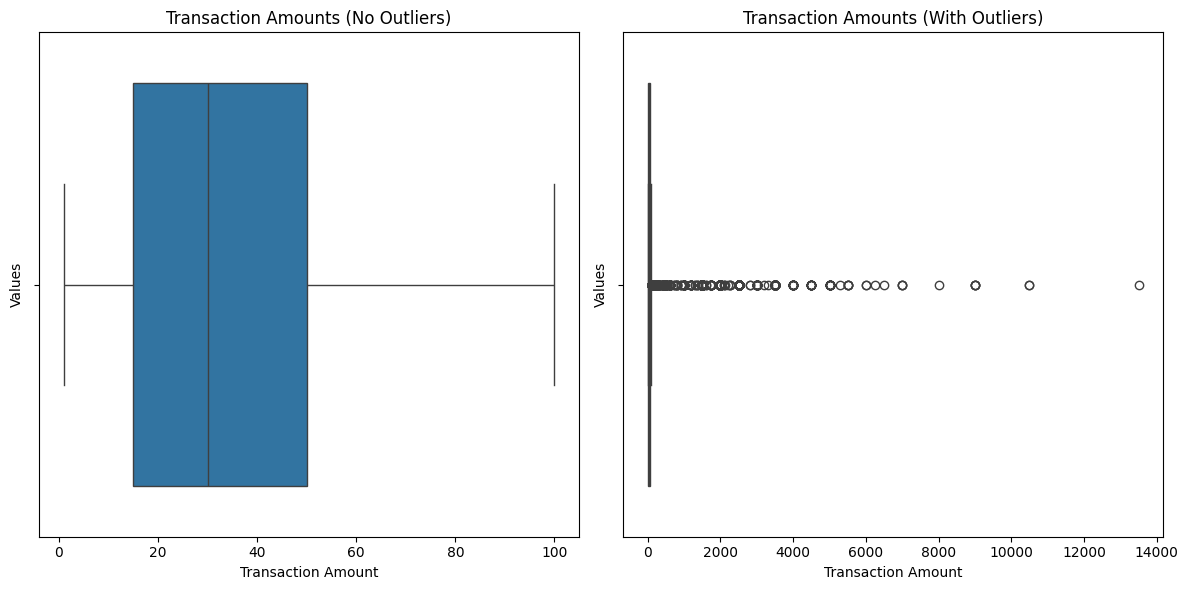

In [45]:
print(data["TransAmount"].min(),data["TransAmount"].max())
#i want to visualize some plots

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

# First subplot: Boxplot without outliers
sns.boxplot(data=data, x="TransAmount", showfliers=False, ax=axes[0])
axes[0].set_title("Transaction Amounts (No Outliers)")
axes[0].set_xlabel("Transaction Amount")
axes[0].set_ylabel("Values")

# Second subplot: Boxplot with outliers
sns.boxplot(data=data, x="TransAmount", ax=axes[1])
axes[1].set_title("Transaction Amounts (With Outliers)")
axes[1].set_xlabel("Transaction Amount")
axes[1].set_ylabel("Values")

plt.tight_layout()  
plt.show()


**Very well!!**. This is how our data on transactions look like.Taking a quick glance at the second plot, we see a crowded/narrow box plot.This means that our data is tightly packed together. Imagine sardines in a can, no space right?. This results to the shape of the plot.The left plot is a result of me 'zooming' into the image while excluding the outliers and we can make it a base case for our analysis.We can gather some insights from it by taking a look:


# I want to check the highest amount of money someone has ever spent using the service 💸. 

This is important in Identifying High-Value Customers.

**Focus on Retention** : High-value customers contribute significantly to  revenue. Identifying them allows you to focus on retention strategies, such as personalized offers and loyalty programs.

**Tailored Marketing**: You can create targeted marketing campaigns to cater to the preferences and needs of these customers, increasing their lifetime value.

In [4]:
def maxtransaction(df,col1):
    """
    This function takes a dataframe and looks into one column.It therefore returns the maximum amount of money spent at a time.

    parameters:
    df: The input dataframe
    col1(str):The column to analyze


    """
    if col1 in df.columns:
        return df[col1].max()
    else:
        raise ValueError("That column does not exist in the dataframe")
    
maxtrans=maxtransaction(dateTrans,'TransAmount')
maxtrans

13500

# Most loyal customers 🫅

## Importance of identifying most loyal customers.
**Increased Revenue**
**Repeat Purchases**: Loyal customers are more likely to make repeat purchases, providing a steady stream of revenue.
Higher Spending: They often spend more per transaction compared to new customers.

2.**Cost Efficiency**
**Lower Acquisition Costs**: Retaining existing customers is generally less expensive than acquiring new ones. Marketing and sales efforts can be more focused and cost-effective.

**Reduced Churn**: Understanding and catering to loyal customers can help reduce churn rates, ensuring a stable customer base.

3. **Word-of-Mouth Marketing**

**Referrals**: Loyal customers are more likely to refer friends and family, acting as brand ambassadors and bringing in new customers through positive word-of-mouth.

**Positive Reviews**: They are more inclined to leave positive reviews and testimonials, enhancing your brand’s reputation.

In [5]:
def toployalcustomers(df, name_col, condition_col, top_n=5):
    """
    This function finds the top N loyal customers based on the most repeated names in the specified column,
    but only counts occurrences where the value in the condition column is zero.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    name_col (str): The column containing customer names.
    condition_col (str): The column to check for the condition (value should be zero).
    top_n (int): The number of top customers to return.

    Returns:
    list: A list of the top N loyal customers.
    """
    if name_col in df.columns and condition_col in df.columns:
        
        filtered_df = df[df[condition_col] == 1]
        
        if not filtered_df.empty:
            
            top_customers = filtered_df[name_col].value_counts().nlargest(top_n).index.tolist()
            return top_customers
        else:
            return "No customers meet the condition."
    else:
        raise ValueError("One or both columns do not exist in the DataFrame")





loyalcustomer=toployalcustomers(data,'KYCInfo','active')
loyalcustomer


['Benrogers Kitavi Kyalo',
 'rajab mohammed ali',
 'masuud',
 'LYDIA',
 'SYLVIA MORAA NTABO']

I want to change that date format.But first to subset the data to transTime column,KYCInfo

# Churn analysis 🏃

## I want to find out the users who have stayed for a long time without using the service.

### I decided to carry out the following analysis for the following reasons:

**User Engagement**: It helps in understanding user engagement levels. If a user hasn’t used the service for a long time, they might be disengaged, which could be a sign that they are not finding the service useful or satisfying.
    
**Customer Retention**: As i said before, it is more cost-effective to retain existing customers than to acquire new ones. By identifying users who haven’t been active recently, the company/business can target them with specific campaigns or offers to encourage them to return.

**Personalized Communication**: Knowing when a user last interacted with the service can help in personalizing communication and offers. For example, if a user hasn’t been active for a while, the company/business might send them a “We miss you” email with a special offer.

In [6]:
#This cell manipulates the dataframe and sets the dataframe to my desired format so i can use it.
customertime=subset_dataframe(data,'KYCInfo','TransTime')

#I want to remove the empty rows of the transTime column since it means the transaction did not go through
customertime.dropna(subset=['TransTime'], inplace=True)
customertime
#getting the date column to datetime and getting the dataframe to  the format that i want
customertime['datetime'] = pd.to_datetime(customertime['TransTime'])
customertime['datetime'] = customertime['datetime'].dt.date
customertime['datetime'] = pd.to_datetime(customertime['datetime'])

customertime.drop('TransTime',axis=1,inplace=True)
customertime

from pandas.api.types import is_datetime64_any_dtype as is_datetime
is_datetime(customertime['datetime'])


True

In [9]:

def get_top_dormant_users(df, user_id_col, date_col):
  """
  This function finds the top 10 users with the most days since their last appearance 
  in the dataframe, considering the latest appearance of each user.

  Args:
      df: The  dataframe containing user data.
      user_id_col: The name of the column containing the user ID(KYCInfo).
      date_col: The name of the column containing the date of user appearance(datetime).

  Returns:
      A pandas dataframe containing the top 10 users with their user ID and days since last appearance.
  """

  #Gets the current date.
  today = pd.Timestamp('today')

  # Sort by date in descending order,this will come in handy later.
  df = df.sort_values(by=date_col, ascending=False)

  # Remove duplicates,since it is the same user, after we arrange in descending order,it wont matter as the current date has already been recorded.
  df = df.drop_duplicates(subset=user_id_col, keep='first')

  # Calculate days since last appearance.
  df['days_dormant'] = today - df[date_col]

  # Group by name and get maximum days dormant
  user_dortmancy = df.groupby(user_id_col)['days_dormant'].max()

  # Sort, here you can also specify the number of people you want to see.
  top_dormant_users = user_dortmancy.sort_values(ascending=False).head(1000)

  # Reset index,failure to do this the 'KYCInfo' column will be the index meaning it won't be considered a column.
  top_dormant_users = top_dormant_users.reset_index()

  # I choose to rename that column for easy understanding
  top_dormant_users.columns = [user_id_col, 'days_dormant']

  return top_dormant_users


top_dormant = get_top_dormant_users(customertime, 'KYCInfo', 'datetime')
print(top_dormant)





                      KYCInfo              days_dormant
0         sammy mwenga wambua 1254 days 19:53:00.290658
1             Anjeline andati 1254 days 19:53:00.290658
2       ABDALLAH YUSUF WAMBUA 1244 days 19:53:00.290658
3    SHAMMAH KARIUKI NG'ANG'A 1240 days 19:53:00.290658
4         PURITY MUTHEU KYALO 1237 days 19:53:00.290658
..                        ...                       ...
995                   EMANUEL   30 days 19:53:00.290658
996                     ISAYA   30 days 19:53:00.290658
997                    SHEILA   30 days 19:53:00.290658
998                 CELESTINE   29 days 19:53:00.290658
999                      LUCY   29 days 19:53:00.290658

[1000 rows x 2 columns]


In [ ]:
%%capture
dateTrans.rename(columns={'created_at':'date'},inplace=True)

I want to visualize the trend of revenue from when they started operation to now